<a href="https://colab.research.google.com/github/rzazyx/Movie-Analytics/blob/main/Movie_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # -> Module yang digunaakn untuk analisis data, editing dataframe
import numpy as np # -> Module yang digunakan untuk operasi matematika
import matplotlib.pyplot as plt # -> Module yang digunakan untuk melakukan visualisasi data
import seaborn as sns # -> Module yang digunakan untuk melakukan visualisasi data
import os # -> Untuk melakukan operasi sistem di google colab

In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [7]:
movies_data = pd.read_csv("movies_metadata.csv")

In [8]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45463 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45463 non-null  int64  
 3   genres                 45463 non-null  object 
 4   homepage               7779 non-null   object 
 5   id                     45463 non-null  int64  
 6   imdb_id                45446 non-null  object 
 7   original_language      45452 non-null  object 
 8   original_title         45463 non-null  object 
 9   overview               44509 non-null  object 
 10  popularity             45460 non-null  float64
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  re

In [9]:
movies_data.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14878,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,20871,tt0068519,ru,Джентльмены удачи,A kindergarten director Troshkin is a dead rin...,...,1971-12-13,0.0,88.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Gentlemen of Fortune,False,7.4,39.0
10532,True,NaN,474700,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,7974,tt0098532,fi,Tulitikkutehtaan tyttö,Iris (Kati Outinen) has a soul-deadening job a...,...,1990-09-20,0.0,66.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,NaN,The Match Factory Girl,False,7.0,40.0
40771,True,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,185564,tt1714202,en,A Crush on You,A man sends secret admirer e-mails to his crus...,...,2011-06-11,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Crush on You,False,6.4,5.0
23030,True,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,31950,tt0073131,en,The 'Human' Factor,After his family is brutally murdered for an u...,...,1975-01-01,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every 24 hours an American family will be kill...,The 'Human' Factor,False,6.6,4.0
26053,True,NaN,2500000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,146631,tt2040578,en,U.F.O.,A group of friends awake one morning to find a...,...,2012-12-14,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Try to remain calm,U.F.O.,False,3.1,47.0
43711,True,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,156643,tt2458314,zh,Da Shang Hai,Set in Shanghais Gangster era of the early 190...,...,2012-12-22,0.0,118.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,Loyalty At All Costs,The Last Tycoon,False,6.2,15.0
12738,True,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,43031,tt0053765,bn,দেবী,"Devi focuses on a young woman, who is deemed a...",...,1960-02-19,0.0,93.0,"[{'iso_639_1': 'bn', 'name': 'বাংলা'}]",Released,NaN,The Goddess,False,6.9,9.0
4017,True,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,10984,tt0242998,en,Valentine,Five friends are stalked and murdered by a mas...,...,2001-02-01,0.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Remember that kid everyone ignored on Valentin...,Valentine,False,5.0,114.0
5159,True,NaN,45000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1537,tt0264472,en,Changing Lanes,A rush-hour fender-bender on New York City's c...,...,2002-04-07,94935764.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"An ambitious lawyer, a desperate father, they ...",Changing Lanes,False,5.9,306.0
19439,True,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,129535,tt0032916,en,Play Girl,When a gold digger starts to get a little old ...,...,1941-03-07,0.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Play Girl,False,6.5,1.0


In [10]:
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"])

In [11]:
movies_data["release_date"].dtypes

dtype('<M8[ns]')

In [12]:
movies_data["status"].unique()


array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [13]:
movies_data["original_language"].nunique()

89

#movies_data["status"] == "Released"

In [14]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45463 non-null  bool          
 1   belongs_to_collection  4491 non-null   object        
 2   budget                 45463 non-null  int64         
 3   genres                 45463 non-null  object        
 4   homepage               7779 non-null   object        
 5   id                     45463 non-null  int64         
 6   imdb_id                45446 non-null  object        
 7   original_language      45452 non-null  object        
 8   original_title         45463 non-null  object        
 9   overview               44509 non-null  object        
 10  popularity             45460 non-null  float64       
 11  poster_path            45077 non-null  object        
 12  production_companies   45460 non-null  object        
 13  p

In [15]:
movies_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,True,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,True,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,True,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,True,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,True,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [16]:
movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

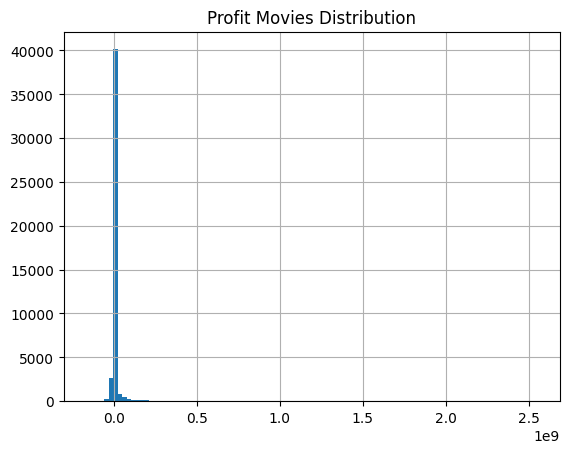

In [17]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [18]:
movies_data["profit"].describe()

,profit
count,4.546000e+04
mean,6.984491e+06
std,5.214125e+07
min,-1.657101e+08
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.550965e+09


In [19]:
import seaborn as sns

<Axes: >

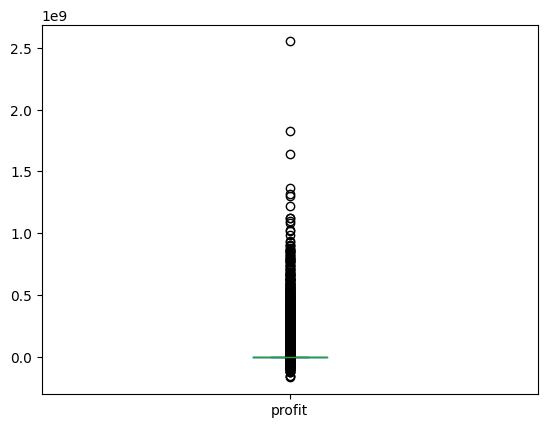

In [20]:
movies_data["profit"].plot(kind = "box")

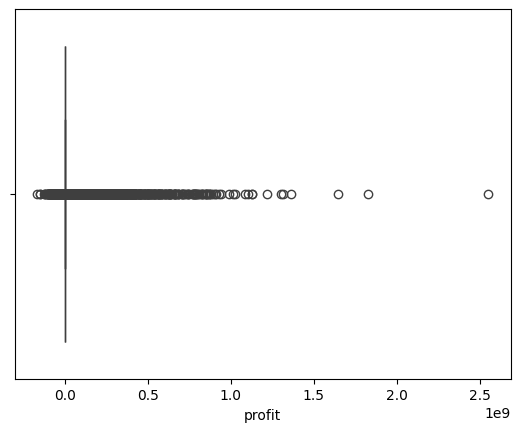

In [21]:
sns.boxplot(data = movies_data, x = "profit")
plt.show()

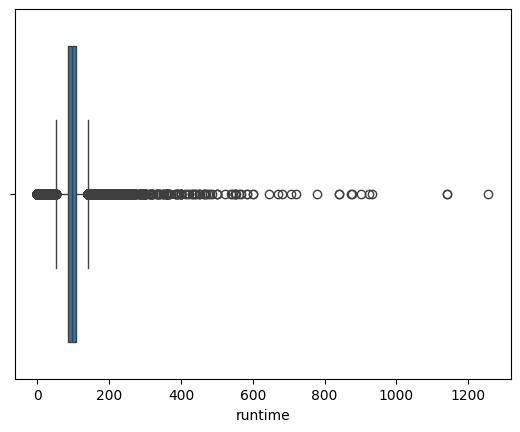

In [22]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

In [23]:
movies_data["profit"].quantile(0.9)

1578210.8999999824

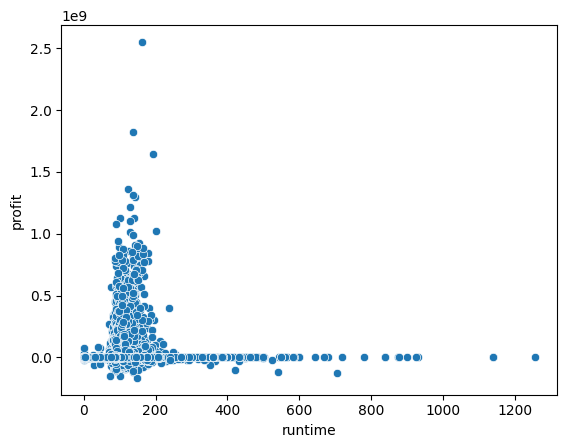

In [24]:
sns.scatterplot(data = movies_data,
                x = "runtime",
                y = "profit")
plt.show()

In [25]:
profitable_movies = movies_data[movies_data["profit"] > 0]

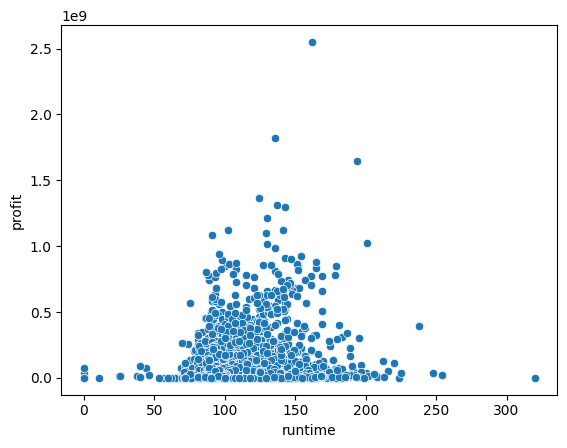

In [26]:
sns.scatterplot(data = profitable_movies,
                x = "runtime",
                y = "profit")
plt.show()

In [28]:
uploaded = files.upload()

Saving ratings_small.csv to ratings_small.csv


In [29]:
rating = pd.read_csv("ratings_small.csv")

In [30]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

<Axes: xlabel='rating', ylabel='Count'>

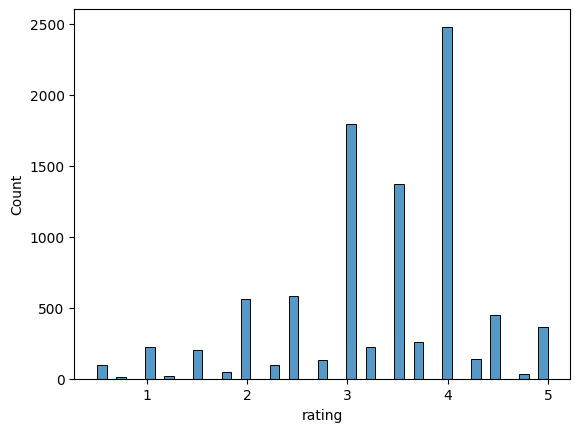

In [31]:
sns.histplot(data = rating_movies,
                x = "rating")

In [32]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

<Axes: ylabel='count'>

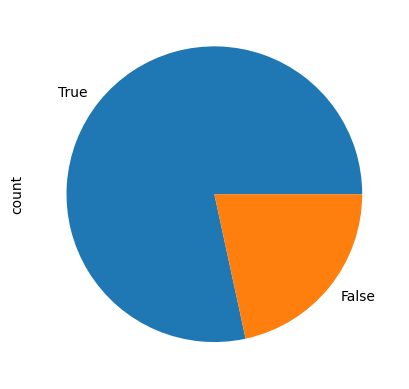

In [33]:
rating_movies["good_movies"].value_counts().plot(kind = "pie")

In [34]:
new_df = movies_data.merge(rating_movies,
                        left_on = "id",
                        right_on = "movieId",
                        how = "inner")

<Axes: xlabel='profit', ylabel='Count'>

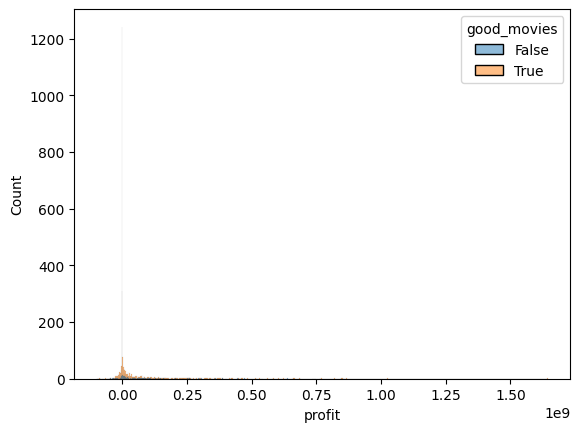

In [35]:
sns.histplot(data = new_df,
             x = "profit",
             hue = "good_movies")

<Axes: xlabel='rating', ylabel='profit'>

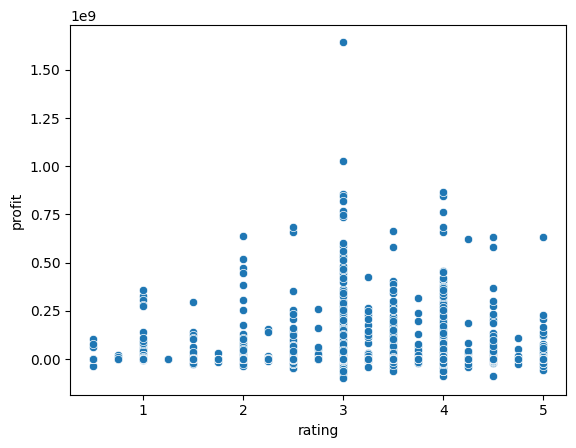

In [36]:
sns.scatterplot(data = new_df,
             x = "rating",
                y = "profit")

In [37]:
new_df[["rating"]]

,rating
0,3.75
1,1.50
2,4.00
3,3.50
4,5.00
...,...
2826,3.25
2827,4.00
2828,4.00
2829,4.00


<Axes: xlabel='original_language'>

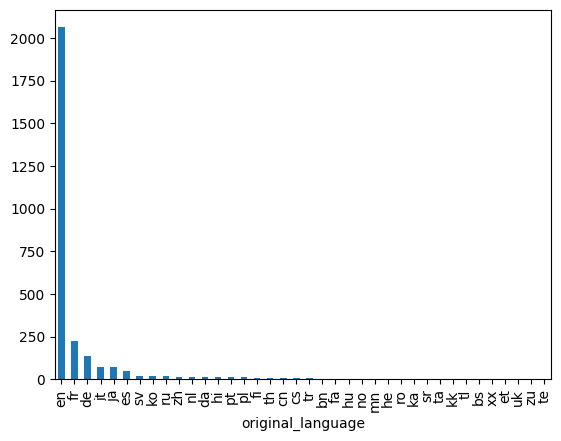

In [38]:
new_df["original_language"].value_counts().plot(kind = "bar")

In [39]:
new_df.select_dtypes(include = "number")

,budget,id,popularity,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,98000000,1408,7.284477,10017322.0,119.0,5.7,137.0,-87982678.0,1408,4.00
3,52000000,524,10.137389,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
4,16500000,4584,10.673167,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
...,...,...,...,...,...,...,...,...,...,...
2826,0,80831,0.083371,0.0,121.0,6.5,2.0,0.0,80831,3.25
2827,0,3104,2.302582,0.0,92.0,5.9,33.0,0.0,3104,4.00
2828,0,64197,0.528657,0.0,97.0,6.0,5.0,0.0,64197,4.00
2829,0,98604,0.803588,0.0,91.0,4.6,6.0,0.0,98604,4.00


In [40]:
def select_columns(df: pd.DataFrame, features: list,  target: list = "rating"):

  df = df.dropna().reset_index(drop = True)
  X = df[features]
  y = (df[target] >= 3).astype("int")

  return X, y

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df, features = features)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
minmax = MinMaxScaler()

In [46]:
minmax.fit(X_train)

MinMaxScaler()

In [47]:
def scaling(df, scaler):

  # df["runtime	"] = df["runtime"].div(60)

  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [48]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [49]:
X_test_scaled.iloc[0]

,0
budget,0.500000
popularity,0.042270
vote_average,0.568182


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

In [52]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [53]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [54]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [55]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,0,6
1,1,35


In [56]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,0,6
1,3,33
